In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(122)

In [2]:
n, m = 10, 20
colors = [np.random.choice(["red", "blue"], n, replace=True) for _ in range(0, 4)]

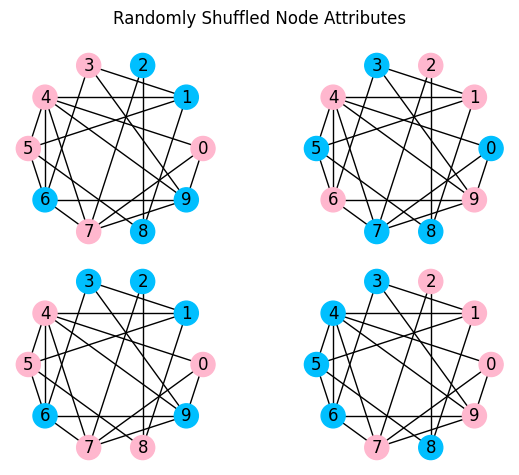

In [3]:
G = nx.gnm_random_graph(n, m)
positions = [(4*np.cos(i * 2 * np.pi/n), 4*np.sin(i * 2 * np.pi/n)) for i in range (n)]
pos = dict(zip(list(G.nodes), positions))
choices = ["#FFB7CE"] * (n//2) + ["#00BFFF"] * (n//2)
colors = [np.random.choice(choices, n, replace=False) for _ in range(0, 252)]
fig, axs = plt.subplots(2, 2, sharex="all", sharey="all")

nx.draw(G, pos=pos, node_color=colors[0], with_labels=True, ax=axs[0, 0])
nx.draw(G, pos=pos, node_color=colors[1], with_labels=True, ax=axs[0, 1])
nx.draw(G, pos=pos, node_color=colors[2], with_labels=True, ax=axs[1, 0])
nx.draw(G, pos=pos, node_color=colors[3], with_labels=True, ax=axs[1, 1])
for i in range(2): 
    for j in range(2): 
        axs[i, j].set_aspect("equal")
fig.suptitle("Randomly Shuffled Node Attributes")
fig.tight_layout()
plt.savefig("randomly-shuffled-colors.png")

In [4]:
with open(r"data\null_distribution_celegans.csv", "r") as file:
    dist = [float(line.strip()) for line in file.readlines()]

In [5]:
dist

[1.6917695578615517,
 5.634188116774024,
 0.42104174771306374,
 2.9615545790149262,
 3.0584638587884787,
 2.0019916812566296,
 4.225335412052696,
 8.26456912357943,
 6.299014744284549,
 6.525683198303034,
 3.111065901804795,
 2.7489797773968965,
 1.0636119213007178,
 5.493396212460251,
 4.402554849304979,
 0.7347584953314984,
 0.5707134233823471,
 5.832198208908866,
 0.6360728775084608,
 36.44686028677247,
 0.6748292732876363,
 2.6540159906675806,
 3.734555373938867,
 14.110082455417363,
 0.3364822872146371,
 1.378567657990673,
 5.385200341962183,
 0.8337437760645021,
 0.7518375429591844,
 22.27744105665241,
 0.7170093262031687,
 2.8071561639562126,
 1.1552298402253722,
 0.9721193342786009,
 1.0584824598385296,
 0.9273546084453158,
 2.0041853471199516,
 2.2426707852170473,
 2.9188858434922964,
 1.3952351938049017,
 5.228106883040853,
 5.378955699268356,
 0.7960174966515584,
 3.959728840054591,
 0.3701436836251716,
 0.40839950139726633,
 2.2188474036366306,
 0.9506630820115184,
 3.59116

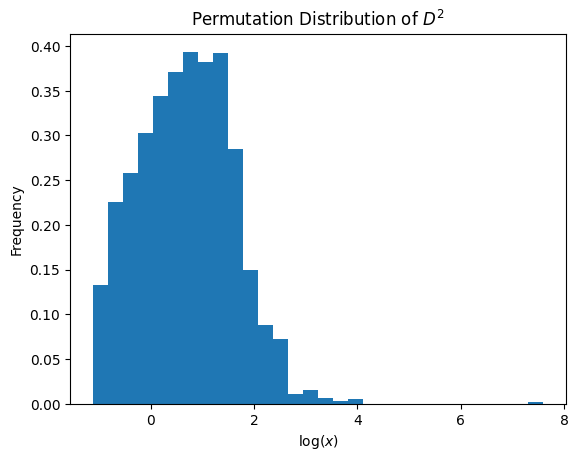

In [6]:
plt.hist(np.log(dist), bins=30, density=True)
plt.title(r"Permutation Distribution of $D^2$")
plt.xlabel(r"$\log(x)$")
plt.ylabel(r"Frequency")
plt.savefig("test_statistic_celegans.png")

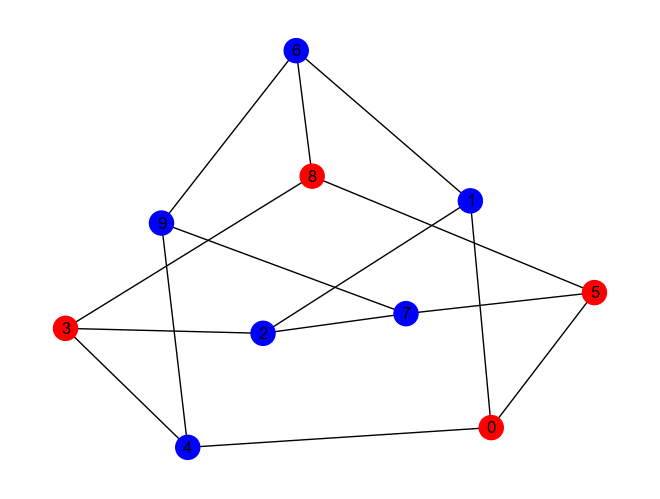

In [14]:
G = nx.petersen_graph()

plt.clf()
colors = np.random.choice(["red", "blue"], 10, replace=True)
nx.draw(G, node_color=list(colors), with_labels=True)

In [8]:
from validation_script import *

run 3 times

In [12]:
P, c = generate_prob_matrix(15, 2, 0.5, -0.5, 0)
G = generate_SBM_static(P)

ValueError: 'c' argument has 15 elements, which is inconsistent with 'x' and 'y' with size 10.

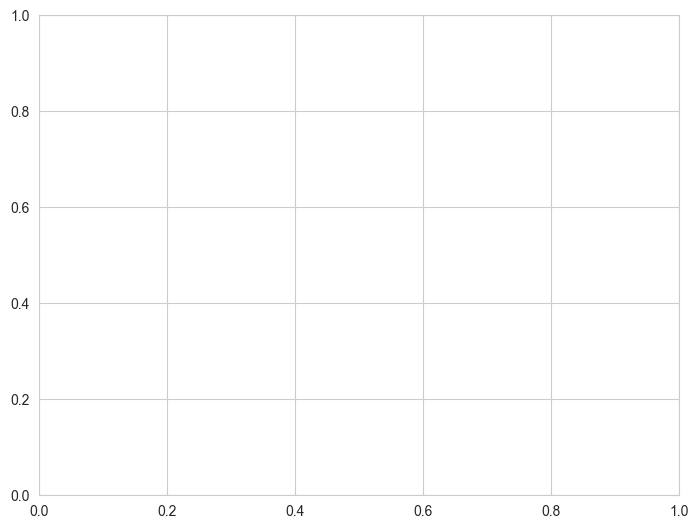

In [16]:
pos = {}

# 2. Get the unique partitions/colors from 'c'
unique_colors = list(set(c))

# 3. Calculate positions for each cluster
for idx, color in enumerate(unique_colors):
    # Find all node IDs belonging to the current color
    # Assuming node IDs in G are integers 0-14 matching the indices in 'c'
    cluster_nodes = [node_id for node_id, col in enumerate(c) if col == color]
    
    # Create a subgraph of just these nodes
    subgraph = G.subgraph(cluster_nodes)
    
    # Generate a spring layout just for this cluster
    # We space them out horizontally by setting the center to (idx * 3, 0)
    # Cluster 0 will center at (0, 0), Cluster 1 will center at (3, 0)
    cluster_pos = nx.spring_layout(subgraph, center=(idx * 3, 0))
    
    # Update the master position dictionary
    pos.update(cluster_pos)

# 4. Draw the graph using the custom positions and color map
# We cast the string-integers in 'c' to actual ints for the colormap
node_colors = [int(color) for color in c]
nx.draw(G, pos=pos, node_color=node_colors, with_labels=True, cmap="Set1")

(0.003,
 53.750630578285765,
 array([  3.33697072,   1.18532147,   2.91014374,   1.07275152,
          5.2110849 ,   2.94479573,   1.43262627,   6.50567198,
          1.65518464,   1.8797818 ,   5.82085657,   0.32011796,
          0.88171366,   0.87738871,   1.47889403,   1.81684824,
          1.92311356,   4.57924125,   3.85073905,   6.5527218 ,
          1.59316773,   3.89338455,   1.10513599,   0.67577866,
          2.02527678,   0.3275124 ,   5.50942275,   6.85095574,
          1.18532147,   2.54554195,  27.11203011,   1.59316773,
         11.2203574 ,   7.71295236,   1.18532147,   2.58554579,
          1.74396196,   1.18532147,   1.47889403,   1.18532147,
          4.96939558,   1.10513599,   6.25935301,   1.09798513,
          2.94479573,   4.3211088 ,   3.82767146,   3.01951153,
          1.01764778,   4.50950589,   0.67577866,   1.97639406,
          3.34937719,   3.14036308,   1.47889403,   6.24965903,
          2.89364441,   7.8624532 ,   2.77895509,   1.43262627,
          1

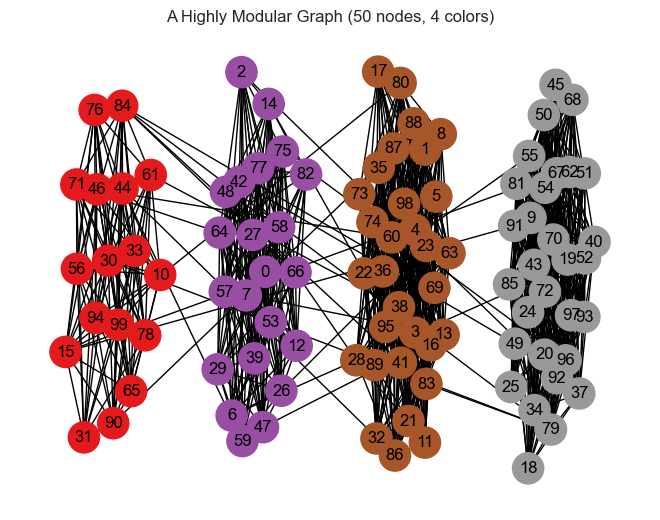

In [72]:
import networkx as nx

# [Your existing code here]
P, c = generate_prob_matrix(100, 4, 1, -5, 0)
G = generate_SBM_static(P)

pos = {}
unique_colors = list(set(c))

# 1. Grab only the nodes that actually survived into G
existing_nodes = list(G.nodes())

for idx, color in enumerate(unique_colors):
    # 2. Filter cluster nodes based ONLY on existing nodes. 
    # This assumes the node IDs in G correspond to their original index in 'c'
    cluster_nodes = [node for node in existing_nodes if c[node] == color]
    
    subgraph = G.subgraph(cluster_nodes)
    cluster_pos = nx.spring_layout(subgraph, center=(idx * 3, 0))
    pos.update(cluster_pos)

# 3. Build the node_color list dynamically in the exact order of G.nodes()
node_colors = [int(c[node]) for node in G.nodes()]

# 4. Draw the graph
plt.clf()
nx.draw(G, pos=pos, node_color=node_colors, node_size=505, with_labels=True, cmap="Set1")
plt.title("A Highly Modular Graph (50 nodes, 4 colors)")
plt.savefig("SBM_4color.png")
dist2 = stats_engine(nk.nxadapter.nx2nk(G), [str(_) for _ in c], iters=1000)
dist2

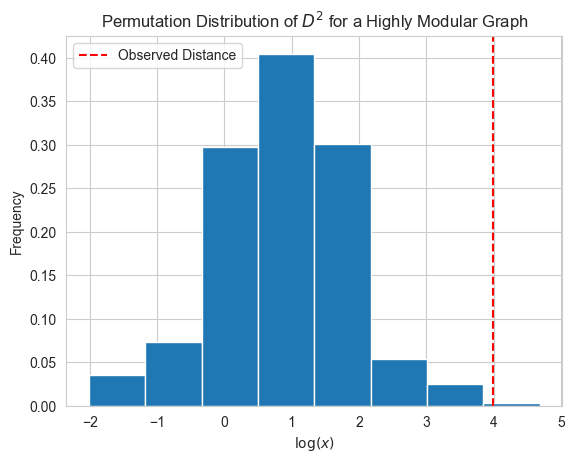

In [73]:
plt.clf()
plt.hist(np.log(dist2[2]), bins=8, density=True)
plt.title(r"Permutation Distribution of $D^2$ for a Highly Modular Graph")
plt.xlabel(r"$\log(x)$")
plt.ylabel(r"Frequency")
plt.axvline(x=np.log(dist2[1]), color='red', linestyle='--', label='Observed Distance')
plt.legend()
plt.savefig("SBM_perm_dist.png")

(0.373,
 1.9250799493708812,
 array([1.37128818e+00, 1.45920074e+00, 4.72196526e+00, 5.38423760e-01,
        1.92507995e+00, 1.03715198e+00, 8.15809579e-01, 4.53332928e+00,
        1.51381737e+00, 6.09582389e+00, 1.51425062e+00, 3.91492621e+00,
        2.45911230e-01, 5.81914011e-01, 1.11802772e+00, 3.44874981e+00,
        1.57762881e+00, 1.60537639e+00, 9.51742717e-01, 2.48008134e+00,
        1.45920074e+00, 2.36688419e+00, 5.74803922e+00, 2.98667042e+00,
        3.58704860e-01, 3.28471433e+00, 5.71934140e-01, 1.75402221e+00,
        6.23038849e-01, 2.57073578e+00, 7.19492459e+00, 1.88100327e+00,
        2.04205550e+00, 1.51381737e+00, 3.62755501e+00, 3.13861810e+00,
        4.92952273e-02, 1.22276713e+00, 6.65743479e-01, 8.15809579e-01,
        5.22298263e-01, 1.93838406e-01, 3.42616362e-01, 2.66536471e+00,
        1.93838406e-01, 3.42616362e-01, 3.09163612e+00, 1.10243215e-01,
        3.93913574e+00, 4.24840799e+00, 7.58219435e-01, 3.56516916e+00,
        3.07765679e-01, 8.66213696e

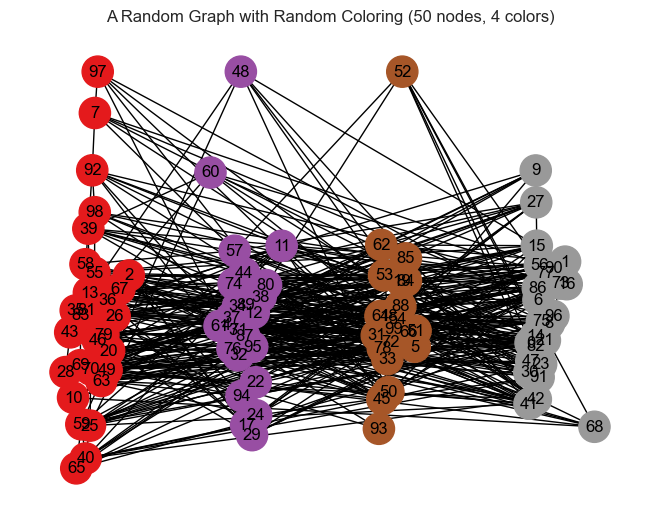

In [78]:
import networkx as nx

# [Your existing code here]
G = nx.gnm_random_graph(100, 500)
P, c = generate_prob_matrix(100, 4, 0, 0, 0)
pos = {}
unique_colors = list(set(c))

# 1. Grab only the nodes that actually survived into G
existing_nodes = list(G.nodes())

for idx, color in enumerate(unique_colors):
    # 2. Filter cluster nodes based ONLY on existing nodes. 
    # This assumes the node IDs in G correspond to their original index in 'c'
    cluster_nodes = [node for node in existing_nodes if c[node] == color]
    
    subgraph = G.subgraph(cluster_nodes)
    cluster_pos = nx.spring_layout(subgraph, center=(idx * 3, 0))
    pos.update(cluster_pos)

# 3. Build the node_color list dynamically in the exact order of G.nodes()
node_colors = [int(c[node]) for node in G.nodes()]

# 4. Draw the graph
plt.clf()
nx.draw(G, pos=pos, node_color=node_colors, node_size=505, with_labels=True, cmap="Set1")
plt.title("A Random Graph with Random Coloring (50 nodes, 4 colors)")
plt.savefig("random_4color.png")
dist2 = stats_engine(nk.nxadapter.nx2nk(G), [str(_) for _ in c], iters=1000)
dist2


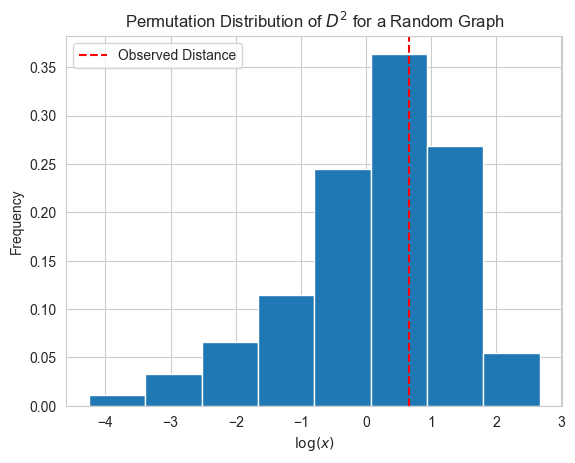

In [79]:
plt.clf()
plt.hist(np.log(dist2[2]), bins=8, density=True)
plt.title(r"Permutation Distribution of $D^2$ for a Random Graph")
plt.xlabel(r"$\log(x)$")
plt.ylabel(r"Frequency")
plt.axvline(x=np.log(dist2[1]), color='red', linestyle='--', label='Observed Distance')
plt.legend()
plt.savefig("random_perm_dist.png")

In [77]:
dist2[0]

0.275